In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Train_newColumns.csv')

In [4]:
#droppiamo un po di colonne
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [5]:
#creiamo 5 sotto-dataframe prendendo le variabili che riteniamo più importanti ai fini di individuare 
#i cluster migliori. stiamo calcolando l'ATTRITION!!!

In [6]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    1013 non-null   int64
 1   DistanceFromHome       1013 non-null   int64
 2   MonthlyIncome          1013 non-null   int64
 3   NumCompaniesWorked     1013 non-null   int64
 4   PercentSalaryHike      1013 non-null   int64
 5   TotalWorkingYears      1013 non-null   int64
 6   TrainingTimesLastYear  1013 non-null   int64
 7   YearsAtCompany         1013 non-null   int64
 8   YearsWithCurrManager   1013 non-null   int64
 9   Stagnation             1013 non-null   int64
dtypes: int64(10)
memory usage: 79.3 KB


In [8]:
#MI - ST - YWCM
df1 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany'])

In [12]:
#ST -YAC -TWY
df2 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','MonthlyIncome','PercentSalaryHike','TrainingTimesLastYear','YearsWithCurrManager'])

In [14]:
#MI - TWY - ST
df3 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear','YearsWithCurrManager','YearsAtCompany'])

In [16]:
#YWMC - TWY - TTLY
df4 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','MonthlyIncome','Stagnation','PercentSalaryHike','YearsAtCompany'])

In [18]:
#MI - YAC - TWY
df5 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','Stagnation','PercentSalaryHike','TrainingTimesLastYear','YearsWithCurrManager'])

In [22]:
scaler = StandardScaler()
df1_zscore = scaler.fit_transform(df1.values)

In [23]:
df1_zscore

array([[-0.54006694,  0.17779098, -0.18658974],
       [ 0.06570391,  0.57890962, -0.44938488],
       [-0.41946365, -1.02556492, -0.44938488],
       ...,
       [ 0.04061922, -1.02556492, -0.44938488],
       [-0.12444793, -1.02556492, -0.44938488],
       [-0.35404669, -1.02556492, -0.44938488]])

In [44]:
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=100)
kmeans.fit(df1_zscore)

KMeans(max_iter=100, n_clusters=10, n_init=20)

In [45]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(df1_zscore, kmeans.labels_))

SSE 419.2215995551746
Silhouette 0.42684738887661916


In [31]:
#con i k.means dobbiamo determinare il miglior numero di cluster attraverso il SSE
sse_list = list()
#da due cluster a 50+1 perche partiamo  da 0
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df1_zscore)
    #calcoliamo il sse e lo appendiamo in una lista per plottarla
    sse = kmeans.inertia_
    sse_list.append(sse)

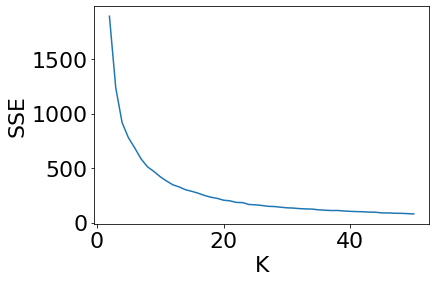

In [32]:
#possiamo scelgiere il valore migliore vedendo il primo punto in cui si ottiene il minor SSE
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

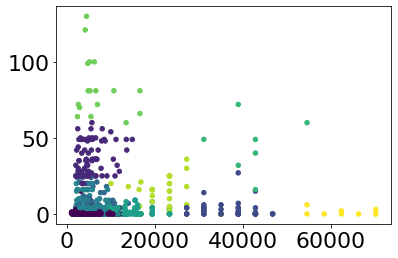

In [59]:
plt.scatter(df1['MonthlyIncome'], df1['Stagnation'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()